<a href="https://colab.research.google.com/github/vimalkumar2992/Joey_vs_Brad_Pitt_CNN/blob/master/Joey_vs_Brad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# mouting google drive
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


# Reading the files from drive and creating handles


In [0]:
import os
train_joey_dir = os.path.join('gdrive/My Drive/joey_vs_brad/Train_images/Joey')
train_brad_dir = os.path.join('gdrive/My Drive/joey_vs_brad/Train_images/Brad')
train_joey_names = os.listdir(train_joey_dir)
train_brad_names = os.listdir(train_brad_dir)

# Checking if the location is accessible from colab

In [4]:
ls 'gdrive/My Drive/joey_vs_brad/Train_images/Joey'

100.jpg  19.jpg  28.jpg  37.jpg  46.jpg  55.jpg  64.jpg  73.jpg  82.jpg  91.jpg
10.jpg   1.jpg   29.jpg  38.jpg  47.jpg  56.jpg  65.jpg  74.jpg  83.jpg  92.jpg
11.jpg   20.jpg  2.jpg   39.jpg  48.jpg  57.jpg  66.jpg  75.jpg  84.jpg  93.jpg
12.jpg   21.jpg  30.jpg  3.jpg   49.jpg  58.jpg  67.jpg  76.jpg  85.jpg  94.jpg
13.jpg   22.jpg  31.jpg  40.jpg  4.jpg   59.jpg  68.jpg  77.jpg  86.jpg  95.jpg
14.jpg   23.jpg  32.jpg  41.jpg  50.jpg  5.jpg   69.jpg  78.jpg  87.jpg  96.jpg
15.jpg   24.jpg  33.jpg  42.jpg  51.jpg  60.jpg  6.jpg   79.jpg  88.jpg  97.jpg
16.jpg   25.jpg  34.jpg  43.jpg  52.jpg  61.jpg  70.jpg  7.jpg   89.jpg  98.jpg
17.jpg   26.jpg  35.jpg  44.jpg  53.jpg  62.jpg  71.jpg  80.jpg  8.jpg   99.jpg
18.jpg   27.jpg  36.jpg  45.jpg  54.jpg  63.jpg  72.jpg  81.jpg  90.jpg  9.jpg


# Other imports

In [0]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Visualizing few of the pictures of Joey and Brad, as if we don't know them

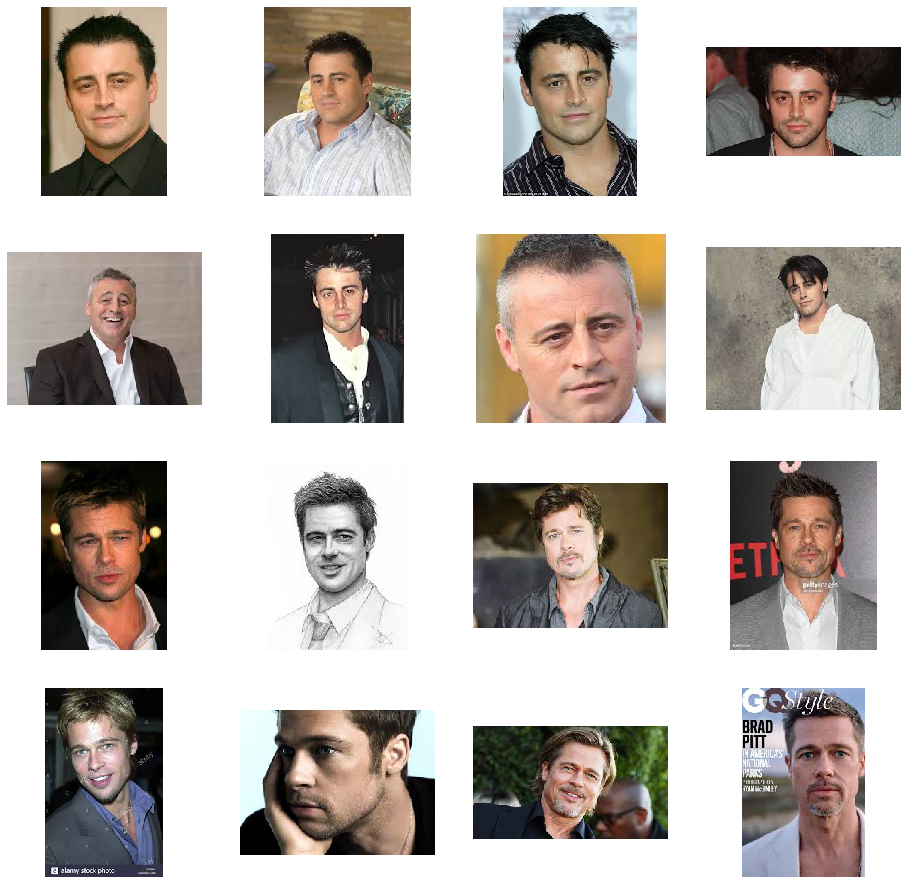

In [6]:
pic_index = 0
fig = plt.gcf()
nrows = 4
ncols = 4
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_joey_pix = [os.path.join(train_joey_dir, fname) 
                for fname in train_joey_names[pic_index-8:pic_index]]
next_brad_pix = [os.path.join(train_brad_dir, fname) 
                for fname in train_brad_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_joey_pix+next_brad_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

# Importing tensor flow

In [7]:
import tensorflow as tf

# Defining a model to differentiate joey and brad

In [8]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


# Let's look at the layers, and the count of parameters

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 32)      18464     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 33, 33, 64)        3

# Defining the loss function and the kind of optimizer
# Refer to https://gombru.github.io/2018/05/23/cross_entropy_loss/ for more info

In [10]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


# Creating the data generator
# This is basically to convert the training images to the expected size/convert them to matrices/label the observations


In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        'gdrive/My Drive/joey_vs_brad/Train_images/',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 150x150
        batch_size=128,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

Found 200 images belonging to 2 classes.


# Fitting the model
# 15 epochs - 15 times the dataset will be read during the training process
# verbose determines the amount of information to be showcased during the training process
# steps per epoch basically splits the entire training dataset into those many parts and performs a step

In [12]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=8,  
      epochs=15,
      verbose=1)

Epoch 1/15
8/8 [==============================] - 61s 8s/step - loss: 1.3903 - acc: 0.5088
Epoch 2/15
8/8 [==============================] - 3s 372ms/step - loss: 0.7195 - acc: 0.5150
Epoch 3/15
8/8 [==============================] - 3s 374ms/step - loss: 0.6841 - acc: 0.5688
Epoch 4/15
8/8 [==============================] - 3s 387ms/step - loss: 0.6520 - acc: 0.5863
Epoch 5/15
8/8 [==============================] - 3s 391ms/step - loss: 0.6332 - acc: 0.6525
Epoch 6/15
8/8 [==============================] - 3s 391ms/step - loss: 0.5505 - acc: 0.7088
Epoch 7/15
8/8 [==============================] - 3s 410ms/step - loss: 0.6758 - acc: 0.7050
Epoch 8/15
8/8 [==============================] - 3s 409ms/step - loss: 0.4537 - acc: 0.7925
Epoch 9/15
8/8 [==============================] - 3s 393ms/step - loss: 0.4291 - acc: 0.7962
Epoch 10/15
8/8 [==============================] - 3s 402ms/step - loss: 0.3565 - acc: 0.8288
Epoch 11/15
8/8 [==============================] - 3s 403ms/step - loss

# This is a massive piece of code that is completely owned by Lawrence Moroney, which visualizes the datapoints across convolutions
# This highlights the important features from the image, that has resulted in the classification
# I need to explore more to understand this piece of code better


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in true_divide


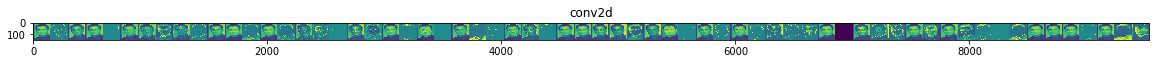

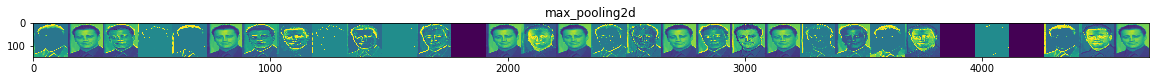

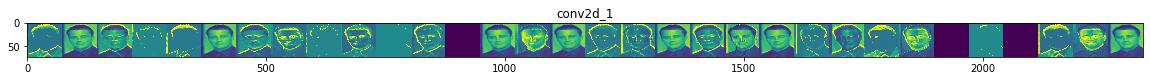

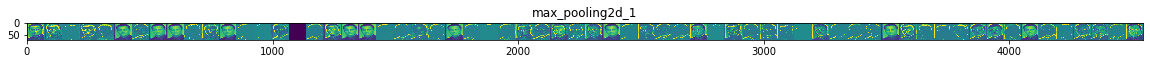

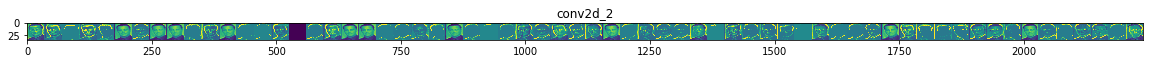

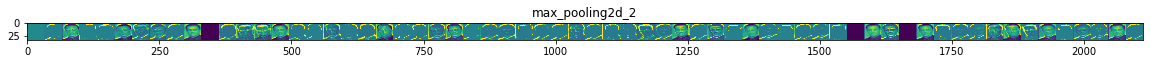

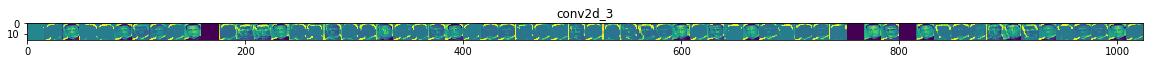

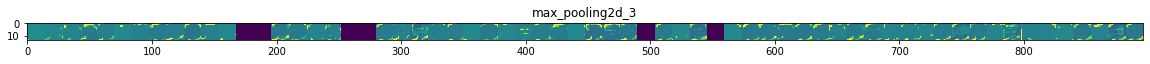

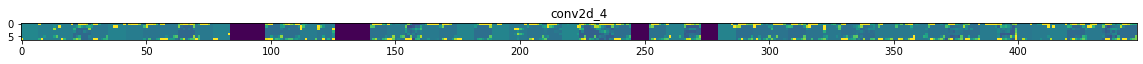

In [13]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)
# Let's prepare a random input image from the training set.
joey_img_files = [os.path.join(train_joey_dir, f) for f in train_joey_names]
brad_img_files = [os.path.join(train_brad_dir, f) for f in train_brad_names]
img_path = random.choice(joey_img_files + brad_img_files)

img = load_img(img_path, target_size=(300, 300))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# Now let's display our representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map
    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      # Postprocess the feature to make it visually palatable
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      # We'll tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

# This piece of code lets us to upload an image of our interest and predict whether its Joey or Brad
# I know you will upload your photo and check if you are more of a brad or a joey :P 



In [16]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  # path = '/root/' + fn
  img = image.load_img(path, target_size=(300, 300))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " It's joey")
  else:
    print(fn + " It's brad")

Saving 1366_v9_bb.jpg to 1366_v9_bb.jpg
[1.]
1366_v9_bb.jpg It's joey
